# Gas powerplant 
- In this notebook I will present the complete solution for the gas power plant valuation problem. 
- In the end it might be too large and I will need to make helper files for the individual functions. For now I dont know. 

In [1]:
import sys
import os


sys.path.append("/Users/filiprolenec/Desktop/MT/MTpython/src")

In [2]:
from gas_example.enum_types import RunningState, PowerplantState

In [3]:
from gas_example.simulation import run_simulation

In [14]:
from  gas_example.state import State
import gas_example.strategy as s
import matplotlib.pyplot as plt
import time
from progressbar import progressbar


# Initial settings 

In [15]:
initial_state = State(24,9,39,1,PowerplantState.NOT_BUILT,RunningState.NOT_RUNNING,0)
epoch = 0 

In [16]:
strategy_0 = s.Strategy(s.heuristic_strategy_0)
strategy_1 = s.Strategy(s.heuristic_strategy_1)
strategies = [strategy_0, strategy_1]

In [17]:
import time
import sys

results_final = {}
for i in range(2):
    results = []
    for j in progressbar(range(1500)):
        results.append(run_simulation(strategies[i], initial_state))
    results_final[i]= results
    


100% (1500 of 1500) |####################| Elapsed Time: 0:00:33 Time:  0:00:33
100% (1500 of 1500) |####################| Elapsed Time: 0:00:33 Time:  0:00:33


(array([862., 362., 155.,  60.,  30.,  13.,  10.,   3.,   3.,   2.]),
 array([-8.34059644e+08,  3.47752972e+08,  1.52956559e+09,  2.71137820e+09,
         3.89319082e+09,  5.07500343e+09,  6.25681605e+09,  7.43862866e+09,
         8.62044128e+09,  9.80225389e+09,  1.09840665e+10]),
 <BarContainer object of 10 artists>)

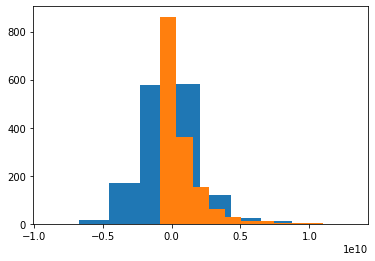

In [18]:
plt.hist(results_final[0])
plt.hist(results_final[1])